## **Vision-based angle prediction (SC42050 - Knowledge Based Control Systems)**

# Optionally seed the run, define your model, and fit to the training data 

Loaded observation data: (12120, 28, 28, 3)
Loaded state data: (12120, 2)


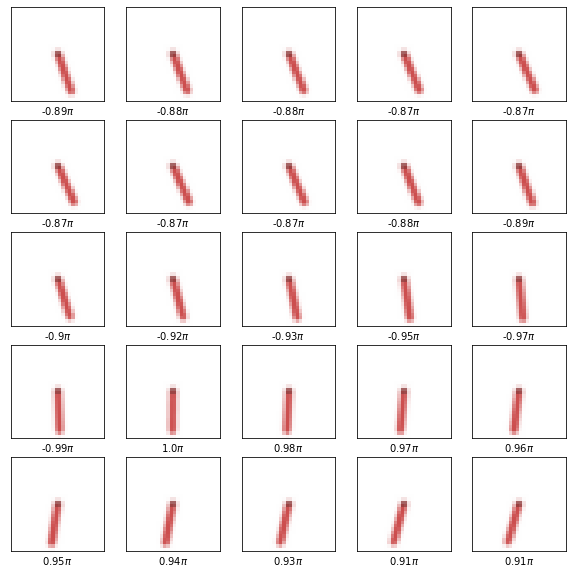

ValueError: Variable 'model' not defined! Make sure to name every keras model 'model'!

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

# FUNCTION TO SEED PSEUDO-RANDOM GENERATORS
def seed_experiment(seed=None, use_cpu=True):
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    import random
    import numpy as np
    import tensorflow as tf

    # Seed value
    # Apparently you may use different seed values at each stage
    seed_value = seed

    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    os.environ['PYTHONHASHSEED'] = str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    np.random.seed(seed_value)

    # 4. Set the `tensorflow` pseudo-random generator at a fixed value
    tf.random.set_seed(seed_value)
    
    # 5. force tensorflow to use CPU
    if use_cpu:
        os.environ['CUDA_VISIBLE_DEVICES'] = ''
    return seed_value

# SEED EXPERIMENT TO CREATE REPRODUCIBLE RESULTS
"""TASK 1.4: PSEUDO-RANDOM GENERATOR"""
seed_value = 0
# seed_experiment(seed=seed_value)  # Comment this line to disable the seeding
"""TASK 1.4: END"""

# LOAD DATASET
with h5py.File('./dataset.h5', 'r') as hf:
    observation = hf['observation.h5'][:]
    state = hf['state.h5'][:]
print('Loaded observation data: %s' % str(observation.shape))
print('Loaded state data: %s' % str(state.shape))

# DATASET PARAMETERS
num_examples = 12000
observation = observation[:num_examples]
state = state[:num_examples]

# DATA PRE-PROCESSING
# Scale pixel values to a range of 0 to 1 before feeding them to the neural network model.
observation = observation.astype(np.float32) / 255.

# CREATE TEST DATASET
test_split = 0.2
if 0 < test_split < 1:
    split_at = int(len(observation) * (1 - test_split))
else:
    raise ValueError('Must hold-out data as a test dataset. Set parameter 0 < test_split < 1.')
test_obs = observation[split_at:, :, :, :]
test_theta = state[split_at:, 0]
test_trig = np.hstack([np.sin(test_theta)[:, None], np.cos(test_theta)[:, None]])

# CREATE TRAINING DATASET
train_obs = observation[:split_at, :, :, :]
train_theta = state[:split_at, 0]
train_trig = np.hstack([np.sin(train_theta)[:, None], np.cos(train_theta)[:, None]])

# VERIFY TRAINING DATA
# To verify that the data is in the correct format and that you're ready to build and train the network,
# let's display the first 25 images from the dataset and display the corresponding theta value below each image.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_obs[i])
    plt.xlabel(str(round(train_theta[i]/np.pi, 2)) + '$\\pi$')
plt.show()

# MODEL PARAMETERS
model_type = 'model_theta'  # 'model_theta', 'model_trig', 'model_cnn'

# BUILD MODELS
# Building the neural network requires configuring the layers of the model, then compiling the model.
if model_type == 'model_theta':  # Predict theta directly
    """TASK 1.1: CREATE MODEL HERE"""
    
    """TASK 1.1: END"""
    str_model_type = '$M^\\theta$'
elif model_type == 'model_trig':  # Predict trigonometric functions of theta
    """TASK 1.2: CREATE MODEL HERE"""
    
    """TASK 1.2: END"""
    str_model_type = '$M^{trig}$'
elif model_type == 'model_cnn':  # Use a CNN
    """TASK 1.3: CREATE MODEL HERE"""
    
    """TASK 1.3: END"""
    str_model_type = '$M^{cnn}$'
else:
    raise ValueError('Unknown model type selected.')

# VERIFY THAT A MODEL WAS DEFINED
try:
    model
except NameError:
    raise ValueError("Variable 'model' not defined! Make sure to name every keras model 'model'!")

# COMPILE MODEL
"""TASK 1.1: COMPILE MODEL HERE"""

"""TASK 1.1: END"""

# FIT MODEL ON DATA
validation_split = 0.2
shuffle = True
batch_size = 64
epochs = 30
if model_type != 'model_theta':  # i.e. 'model_trig', 'model_cnn'
    """TASK 1.2: TRAIN MODEL HERE"""
    
    """TASK 1.2: END"""
else: # i.e. 'model_theta'
    """TASK 1.1: TRAIN MODEL HERE"""
    
    """TASK 1.1: END"""

# Evaluate your model

In [ ]:
# EVALUATE PERFORMANCE ON TEST DATASET
if model_type != 'model_theta':
    test_scores = model.evaluate(test_obs, test_trig, verbose=1)
    output = model.predict(test_obs)
    pred_theta = np.arctan2(output[:, 0], output[:, 1])
else:
    test_scores = model.evaluate(test_obs, test_theta, verbose=1)
    pred_theta = model.predict(test_obs)[:, 0]
# print("Test loss:", test_scores)

# EVALUATE MODEL ACCURACY
# Calculate average error per bin over theta range [-pi, pi]
test_error = np.abs(test_theta - pred_theta)
test_error[test_error > np.pi] -= 2*np.pi
test_error = np.abs(test_error)
bins = np.linspace(-np.pi, np.pi, 21)
digitized = np.digitize(test_theta, bins)
bin_means = np.array([test_error[digitized == i].mean() for i in range(1, len(bins))])
fig, ax = plt.subplots()
ax.bar(bins[:-1], bin_means, width=np.diff(bins), edgecolor="black", align="edge")
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$|\\bar{\\theta} -\\theta|$')
ax.set_title('%s - Average prediction error %s' % (str_model_type, '{:.2e}'.format(test_error.mean())));

# Summary of the model

In [ ]:
# MODEL SUMMARY
model.summary()